In [1144]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [1145]:
#All the features from the csv file
col_names = ['DailyAverageDewPointTemperature','DailyAverageDryBulbTemperature',
             'DailyAverageRelativeHumidity','DailyAverageSeaLevelPressure',
             'DailyAverageStationPressure','DailyAverageWetBulbTemperature',
             'DailyAverageWindSpeed','DailyCoolingDegreeDays',
             'DailyDepartureFromNormalAverageTemperature','DailyHeatingDegreeDays',
             'DailyMaximumDryBulbTemperature','DailyMinimumDryBulbTemperature',
             'DailyPeakWindDirection','DailyPeakWindSpeed',
             'DailyPrecipitation','DailySnowDepth','DailySnowfall',
             'DailySustainedWindDirection','DailySustainedWindSpeed','Sunrise','Sunset']
temperature_names = ['DailyAverageDewPointTemperature',
             'DailyAverageWetBulbTemperature',
             'DailyMaximumDryBulbTemperature','DailyMinimumDryBulbTemperature']
air_condition_names = ['DailyAverageRelativeHumidity',
             'DailyAverageStationPressure']
day_names = ['DailyHeatingDegreeDays']
wind_speed_names = ['DailyPeakWindSpeed', 'DailySustainedWindSpeed']
wind_direction_names = ['DailyPeakWindDirection', 'DailySustainedWindDirection']


# load dataset
weather = pd.read_csv("data/boise.csv", header=None, names=col_names, skiprows=[0,1])
yesterday = pd.read_csv("data/boise.csv", header=None, names=col_names, skiprows=[0])
yesterday.drop(yesterday.tail(1).index,inplace=True)
bend = pd.read_csv("data/bend.csv", header=None, names=col_names, skiprows=[0,1])

In [1146]:
weather

,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,...,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset
0,15.0,28,59.0,30.67,27.55,23.0,4.1,0,-5.8,37,...,18,300.0,17.0,0,0,0,310,12,759,1759
1,24.0,37,65.0,30.46,27.37,31.0,0.8,0,3.1,28,...,29,270.0,13.0,0.01,0,0,280,7,758,1800
2,28.0,41,63.0,30.26,27.24,35.0,9.0,0,6.9,24,...,32,340.0,29.0,0,0,0,320,24,757,1802
3,27.0,36,70.0,30.34,27.29,33.0,1.6,0,1.7,29,...,28,90.0,8.0,0,0,0,60,7,756,1803
4,28.0,38,69.0,30.10,27.07,33.0,8.6,0,3.4,27,...,30,300.0,33.0,0.01,0,T,300,28,754,1804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,23.0,26,91.0,30.16,27.09,25.0,4.5,0,-3.6,39,...,20,280.0,14.0,T,0,T,260,12,818,1716
3617,22.0,25,91.0,30.34,27.27,23.0,5.0,0,-4.6,40,...,21,170.0,13.0,T,0,T,160,10,818,1717
3618,23.0,29,77.0,30.26,27.18,27.0,7.6,0,-0.6,36,...,23,150.0,28.0,0.01,0,0.2,130,21,818,1718
3619,29.0,34,88.0,30.20,27.16,31.0,2.9,0,4.3,31,...,29,130.0,13.0,0.01,0,0.2,130,9,818,1719


In [1147]:
yesterday

,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,...,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset
0,9.0,23,57.0,30.62,27.50,19.0,4.5,0,-10.6,42,...,13,330.0,14.0,0,0,0,330,12,800,1758
1,15.0,28,59.0,30.67,27.55,23.0,4.1,0,-5.8,37,...,18,300.0,17.0,0,0,0,310,12,759,1759
2,24.0,37,65.0,30.46,27.37,31.0,0.8,0,3.1,28,...,29,270.0,13.0,0.01,0,0,280,7,758,1800
3,28.0,41,63.0,30.26,27.24,35.0,9.0,0,6.9,24,...,32,340.0,29.0,0,0,0,320,24,757,1802
4,27.0,36,70.0,30.34,27.29,33.0,1.6,0,1.7,29,...,28,90.0,8.0,0,0,0,60,7,756,1803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,26.0,27,97.0,30.24,27.19,27.0,2.3,0,-2.6,38,...,22,310.0,10.0,T,0,T,280,8,818,1716
3617,23.0,26,91.0,30.16,27.09,25.0,4.5,0,-3.6,39,...,20,280.0,14.0,T,0,T,260,12,818,1716
3618,22.0,25,91.0,30.34,27.27,23.0,5.0,0,-4.6,40,...,21,170.0,13.0,T,0,T,160,10,818,1717
3619,23.0,29,77.0,30.26,27.18,27.0,7.6,0,-0.6,36,...,23,150.0,28.0,0.01,0,0.2,130,21,818,1718


In [1148]:
# inputing the data
for n in col_names:
    weather[n].fillna(weather[n].value_counts().median(), inplace=True)  
for n in col_names:
    yesterday[n].fillna(yesterday[n].value_counts().median(), inplace=True)  
for n in col_names:
    bend[n].fillna(bend[n].value_counts().median(), inplace=True)  

In [1149]:
#Clean up precipitation records where there was trace amounts of precipitation or snow
weather.loc[(weather.DailyPrecipitation == 'T'), 'DailyPrecipitation'] = 0.001
weather.loc[(weather.DailySnowDepth == 'T'), 'DailySnowDepth'] = 0.001
weather.loc[(weather.DailySnowfall == 'T'), 'DailySnowfall'] = 0.001

yesterday.loc[(yesterday.DailyPrecipitation == 'T'), 'DailyPrecipitation'] = 0.001
yesterday.loc[(yesterday.DailySnowDepth == 'T'), 'DailySnowDepth'] = 0.001
yesterday.loc[(yesterday.DailySnowfall == 'T'), 'DailySnowfall'] = 0.001

bend.loc[(bend.DailyPrecipitation == 'T'), 'DailyPrecipitation'] = 0.001

In [1150]:
#Normalize all the things
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
temperatures_norm = pd.DataFrame(scaler.fit_transform(weather[temperature_names]),
                   columns=temperature_names)
air_condition_norm = pd.DataFrame(scaler.fit_transform(weather[air_condition_names]),
                   columns=air_condition_names)
day_norm = pd.DataFrame(scaler.fit_transform(weather[day_names]),
                   columns=day_names)
wind_speed_norm = pd.DataFrame(scaler.fit_transform(weather[wind_speed_names]),
                   columns=wind_speed_names)

yesterday_temperatures_norm = pd.DataFrame(scaler.fit_transform(yesterday[temperature_names]),
                   columns=temperature_names)
yesterday_air_condition_norm = pd.DataFrame(scaler.fit_transform(yesterday[air_condition_names]),
                   columns=air_condition_names)

In [1151]:
#Get a one-hot encoding for wind direction

# do binning
wind = weather[wind_direction_names]
wind.loc[((wind.DailyPeakWindDirection  <= 45) | (wind.DailyPeakWindDirection  > 315)), 'DailyPeakWindDirection'] = 0
wind.loc[((wind.DailyPeakWindDirection  > 45) & (wind.DailyPeakWindDirection  < 135)), 'DailyPeakWindDirection'] = 1
wind.loc[((wind.DailyPeakWindDirection  > 135) & (wind.DailyPeakWindDirection  < 225)), 'DailyPeakWindDirection'] = 2
wind.loc[((wind.DailyPeakWindDirection  > 225) & (wind.DailyPeakWindDirection  < 315)), 'DailyPeakWindDirection'] = 3

wind.loc[((wind.DailySustainedWindDirection  <= 45) | (wind.DailySustainedWindDirection  > 315)), 'DailySustainedWindDirection'] = 0
wind.loc[((wind.DailySustainedWindDirection  > 45) & (wind.DailySustainedWindDirection  < 135)), 'DailySustainedWindDirection'] = 1
wind.loc[((wind.DailySustainedWindDirection  > 135) & (wind.DailySustainedWindDirection  < 225)), 'DailySustainedWindDirection'] = 2
wind.loc[((wind.DailySustainedWindDirection  > 225) & (wind.DailySustainedWindDirection  < 315)), 'DailySustainedWindDirection'] = 3

# generate binary values using get_dummies
one_hot_wind = pd.get_dummies(wind, columns=wind_direction_names, prefix=['Peak_wind_dir', 'Sustained_wind_dir'])
one_hot_wind_names = one_hot_wind.columns.tolist()

best_wind_names = ['Sustained_wind_dir_3','Peak_wind_dir_0.0','Peak_wind_dir_3.0']

one_hot_wind

/home/justin/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Peak_wind_dir_0.0,Peak_wind_dir_1.0,Peak_wind_dir_2.0,Peak_wind_dir_3.0,Sustained_wind_dir_0,Sustained_wind_dir_1,Sustained_wind_dir_2,Sustained_wind_dir_3
0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,1
2,1,0,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0
4,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
3616,0,0,0,1,0,0,0,1
3617,0,0,1,0,0,0,1,0
3618,0,0,1,0,0,1,0,0
3619,0,1,0,0,0,1,0,0


In [1152]:
#Get the change in metrics from yesterday
temp_diff = temperatures_norm - yesterday_temperatures_norm
temp_diff_names = ['DiffAverageDewPointTemperature',
             'DiffAverageWetBulbTemperature',
             'DiffMaximumDryBulbTemperature','DiffMinimumDryBulbTemperature']
temp_diff.columns = temp_diff_names


air_diff = air_condition_norm - yesterday_air_condition_norm
air_diff_names = ['DiffAverageRelativeHumidity',
             'DiffAverageStationPressure']
air_diff.columns = air_diff_names


In [1153]:
#Create the label column
label = (pd.to_numeric(weather['DailyPrecipitation']) > 0).astype(int)

bend_yesterday = (pd.to_numeric(bend['DailyPrecipitation']) > 0).astype(int)
rained_yesterday = (pd.to_numeric(yesterday['DailyPrecipitation']) > 0).astype(int)

In [1154]:
#Create final weather dataframe
weather_df = pd.concat([temperatures_norm, air_condition_norm, wind_speed_norm, day_norm, one_hot_wind, one_hot_days, temp_diff, air_diff], axis=1, join="inner")
weather_df["Bend_yesterday"] = bend_yesterday
weather_df["Rained_yesterday"] = rained_yesterday
weather_df["Label"] = label

In [1155]:
weather_df

,DailyAverageDewPointTemperature,DailyAverageWetBulbTemperature,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageStationPressure,DailyPeakWindSpeed,DailySustainedWindSpeed,DailyHeatingDegreeDays,Peak_wind_dir_0.0,...,Heating_days_68,DiffAverageDewPointTemperature,DiffAverageWetBulbTemperature,DiffMaximumDryBulbTemperature,DiffMinimumDryBulbTemperature,DiffAverageRelativeHumidity,DiffAverageStationPressure,Bend_yesterday,Rained_yesterday,Label
0,0.323529,0.362319,0.298077,0.322222,0.541176,0.967949,0.185185,0.146341,0.544118,0,...,0,0.088235,0.057971,0.038462,0.055556,0.023529,0.006410,0,0,0
1,0.455882,0.478261,0.365385,0.444444,0.611765,0.944872,0.111111,0.024390,0.411765,0,...,0,0.132353,0.115942,0.067308,0.122222,0.070588,-0.023077,0,0,1
2,0.514706,0.536232,0.423077,0.477778,0.588235,0.928205,0.407407,0.439024,0.352941,1,...,0,0.058824,0.057971,0.057692,0.033333,-0.023529,-0.016667,0,1,0
3,0.500000,0.507246,0.365385,0.433333,0.670588,0.934615,0.018519,0.024390,0.426471,0,...,0,-0.014706,-0.028986,-0.057692,-0.044444,0.082353,0.006410,1,0,0
4,0.514706,0.507246,0.384615,0.455556,0.658824,0.906410,0.481481,0.536585,0.397059,0,...,0,0.014706,0.000000,0.019231,0.022222,-0.011765,-0.028205,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,0.441176,0.391304,0.240385,0.344444,0.917647,0.908974,0.129630,0.146341,0.573529,0,...,0,-0.044118,-0.028986,-0.009615,-0.022222,-0.070588,-0.012821,0,1,1
3617,0.426471,0.362319,0.211538,0.355556,0.917647,0.932051,0.111111,0.097561,0.588235,0,...,0,-0.014706,-0.028986,-0.028846,0.011111,0.000000,0.023077,0,1,1
3618,0.441176,0.420290,0.278846,0.377778,0.752941,0.920513,0.388889,0.365854,0.529412,0,...,0,0.014706,0.057971,0.067308,0.022222,-0.164706,-0.011538,0,1,1
3619,0.529412,0.478261,0.307692,0.444444,0.882353,0.917949,0.111111,0.073171,0.455882,0,...,0,0.088235,0.057971,0.028846,0.066667,0.129412,-0.002564,1,1,1


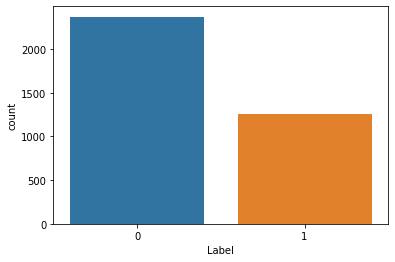

In [1156]:
#0 means no rain, 1 means rain
ax = sns.countplot(x="Label", data=weather_df)

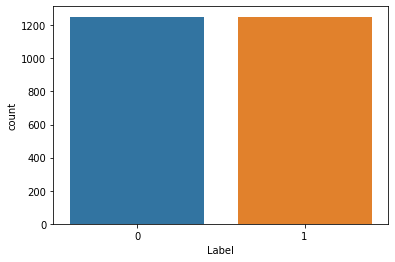

In [1157]:
#Balance the data set
dry = weather_df.loc[(weather_df.Label == 0)]
rain = weather_df.loc[(weather_df.Label == 1)]

dry_sample = dry.sample(rain.shape[0])
weather_df = pd.concat([dry_sample,rain])

#0 means no rain, 1 means rain
ax = sns.countplot(x="Label", data=weather_df)


In [1158]:
#Get the inputs and targets

#Only the columns listed here will be used for training
feature_cols = air_condition_names + temperature_names + wind_speed_names + ["Bend_yesterday"] + ["Rained_yesterday"]
feature_cols += best_wind_names + day_names + air_diff_names + temp_diff_names
X = weather_df[feature_cols] 
y = weather_df.Label
X = X.loc[:,~X.columns.duplicated()]
X

,DailyAverageRelativeHumidity,DailyAverageStationPressure,DailyAverageDewPointTemperature,DailyAverageWetBulbTemperature,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindSpeed,DailySustainedWindSpeed,Bend_yesterday,Rained_yesterday,Sustained_wind_dir_3,Peak_wind_dir_0.0,Peak_wind_dir_3.0,DailyHeatingDegreeDays,DiffAverageRelativeHumidity,DiffAverageStationPressure,DiffAverageDewPointTemperature,DiffAverageWetBulbTemperature,DiffMaximumDryBulbTemperature,DiffMinimumDryBulbTemperature
2747,0.247059,0.901282,0.720588,0.840580,0.788462,0.822222,0.296296,0.243902,0,0,0,1,0,0.000000,0.141176,0.012821,0.014706,-0.072464,-0.153846,-0.088889
1452,0.847059,0.951282,0.544118,0.492754,0.384615,0.422222,0.092593,0.097561,0,0,1,0,1,0.411765,0.023529,-0.006410,0.014706,0.000000,0.057692,-0.022222
1576,0.247059,0.901282,0.705882,0.840580,0.769231,0.755556,0.425926,0.390244,0,0,0,0,0,0.000000,-0.152941,-0.005128,-0.029412,0.028986,0.067308,0.088889
3556,0.376471,0.921795,0.544118,0.637681,0.605769,0.566667,0.185185,0.195122,0,0,0,0,0,0.147059,-0.047059,-0.006410,0.029412,0.043478,0.057692,0.077778
260,0.564706,0.923077,0.705882,0.724638,0.586538,0.622222,0.148148,0.170732,0,0,0,0,0,0.132353,0.023529,0.014103,0.014706,0.014493,0.000000,0.011111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3615,0.988235,0.921795,0.485294,0.420290,0.250000,0.366667,0.055556,0.048780,1,1,1,0,1,0.558824,0.070588,0.017949,-0.088235,-0.101449,-0.096154,-0.066667
3616,0.917647,0.908974,0.441176,0.391304,0.240385,0.344444,0.129630,0.146341,0,1,1,0,1,0.573529,-0.070588,-0.012821,-0.044118,-0.028986,-0.009615,-0.022222
3617,0.917647,0.932051,0.426471,0.362319,0.211538,0.355556,0.111111,0.097561,0,1,0,0,0,0.588235,0.000000,0.023077,-0.014706,-0.028986,-0.028846,0.011111
3618,0.752941,0.920513,0.441176,0.420290,0.278846,0.377778,0.388889,0.365854,0,1,0,0,0,0.529412,-0.164706,-0.011538,0.014706,0.057971,0.067308,0.022222


In [1159]:
#Split the data up into testing and training sets
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

In [1160]:
#Get a new untrained model
model = LogisticRegression(max_iter=5000)

# Train :)
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [1161]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

#Get the model predictions for the test dataset
y_pred = dummy_clf.predict(X_test)

#Check accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Check stratified k-fold accuracy
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=3)
results_skfold = model_selection.cross_val_score(dummy_clf, X, y, cv=skfold)
print('Stratified K-fold Validation: %.2f%%' % (results_skfold.mean()*100.0))

Accuracy: 0.5111821086261981
Stratified K-fold Validation: 49.96%


In [1164]:
#Get the model predictions for the test dataset
y_pred = model.predict(X_test)

#Check accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Check stratified k-fold accuracy
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=3)
results_skfold = model_selection.cross_val_score(model, X, y, cv=skfold)
print('Stratified K-fold Validation: %.2f%%' % (results_skfold.mean()*100.0))

Accuracy: 0.8306709265175719
Stratified K-fold Validation: 84.11%


Text(0.5, 0, 'Importance')

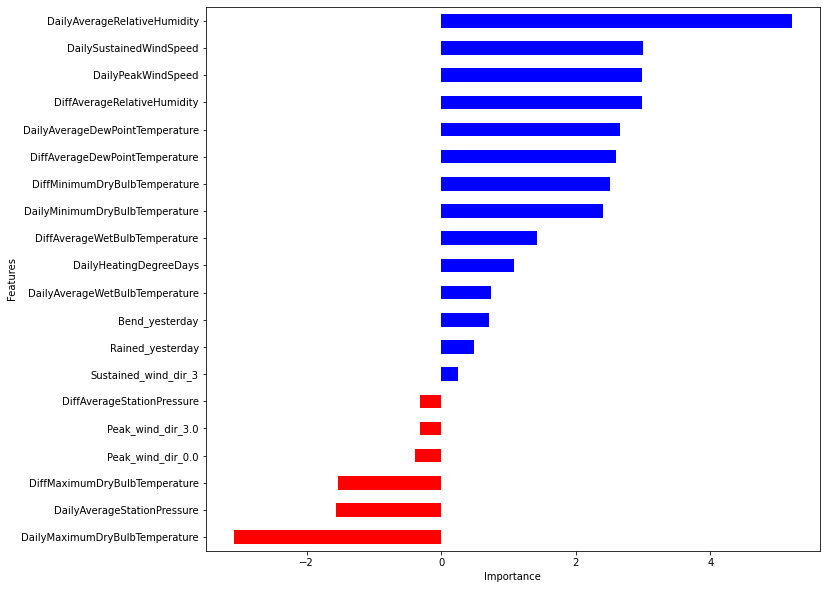

In [1165]:
#Coefficient Magic
coeff = list(model.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 10),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [836]:
# Starting Accuracy: 0.8446969696969697

# Stratified Kfold after Balancing Dataset: 0.81

# Final stratified Kfold: 84.11

# I really liked this assignment, though for the majority of it I felt like I wasn't making a lot of progress.
# I was spinning my wheels for a bit trying to come up with features that improved the accuracy of the model.
# For example, I tried using a one hot encoding for the season, measuring the amount of daylight there was in
# a day, having a very wide one hot encoding for wind direction. None of these really made a big difference on
# the performance of the model. But when we had class tonight, some of the other ideas that others brought up 
# were super helpful. Surprisingly though, when I balanced the dataset it dropped the accuracy by 3%. Though 
# after that I was able to notice more of a difference in the changes I was making. I think the idea of tracking
# the difference in conditions from the past day to the current one was super smart of Jason's part, and it
# definitely helped me out. I know I wasn't able to get the whole 5% increase, but this definitely taught me a 
# lot about feature engineering and diferent techniques you can use to help improve your model
